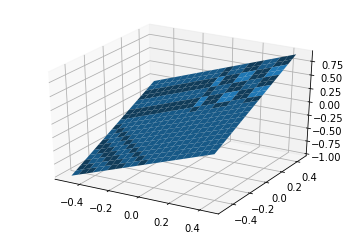

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)
    
    X, Y = np.meshgrid(ws, bs)
    
    os = np.array([actfunc(tf.constant(w*i + b)).eval(session=sess) \
                  for w,b in zip(np.ravel(X), np.ravel(Y))])
    
    Z = os.reshape(X.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
    
#start a session
sess = tf.Session();

#create a simple input of 3 real values
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])

#create a matrix of weights
w = tf.random_normal(shape=[3, 3])

#create a vector of biases
b = tf.random_normal(shape=[1, 3])

#dummy activation function
def func(x): return x

#tf.matmul will multiply the input(i) and the weight(w) tensor then sum the result with the bias(b) tensor.
act = func(tf.matmul(i, w) + b)

#evaluate the tensor to a numpy array
act.eval(session=sess)

plot_act(1.0, func)